<a href="https://colab.research.google.com/github/GutlapalliNikhil/ImageClassification_on_CIFAR10/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri Feb  4 06:47:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEl"] = "3"

import tensorflow as tf
print(tf.__version__)

2.7.0


In [4]:
if not os.path.exists("helper_functions.py"):
  print("Downloading python file")
  !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
  print("Already Present, so skipping..")

Already Present, so skipping..


In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves

In [6]:
import tensorflow_datasets as tfds

In [7]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

Another way of downloading dataset

from tensorflow.keras.datasets import cifar10
(train_image, train_label), (test_image, test_label) = cifar10.load_data()

In [80]:
(train_data, test_data), ds_info = tfds.load(name="cifar10",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info= True)

In [82]:
ds_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [83]:
class_names = ds_info.features["label"].names
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [84]:
train_one_sample = train_data.take(1)

In [85]:
train_one_sample

<TakeDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>

In [86]:
for image, label in train_one_sample:
  print(f"""
  Image Shape - {image.shape}
  Image Dtype - {image.dtype}
  Target class - {label}
  Target label - {class_names[label]}
  """)


  Image Shape - (32, 32, 3)
  Image Dtype - <dtype: 'uint8'>
  Target class - 7
  Target label - horse
  


In [87]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212, 177, 147]

In [88]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=249>)

Text(0.5, 1.0, 'horse')

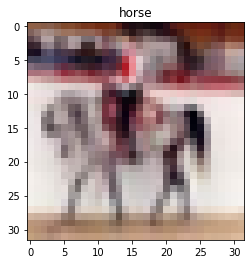

In [89]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label])

In [90]:
def preprocess_image(image, label, image_size=32):
  return tf.cast(image, tf.float32), label

In [92]:
preprocessed_image = preprocess_image(image, label)[0]

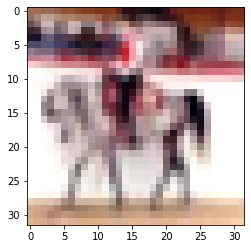

In [93]:
#preprocessed_image = preprocessed_image/225
plt.imshow(preprocessed_image/225)

In [95]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [97]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>)

In [123]:
from helper_functions import create_tensorboard_callback

checkpoint_path = "saved_checkpoints"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)


In [101]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  Tesla K80, compute capability 3.7
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [128]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

input_shape = (32, 32, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name="input_shape", dtype=tf.float32)

x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(10)(x)
outputs = layers.Activation("softmax",dtype=tf.float32)(x)
model = tf.keras.Model(inputs, outputs)

In [129]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

In [130]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [131]:
history = model.fit(train_data,
                    epochs=15,
                    #initial_epoch=history.epoch[-1],
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25 * len(test_data)),
                    callbacks=[model_checkpoint])

Epoch 1/15
1562/1563 [============================>.] - ETA: 0s - loss: 1.5176 - accuracy: 0.4678
Epoch 00001: val_accuracy did not improve from 0.61218
1563/1563 [==============================] - 56s 32ms/step - loss: 1.5176 - accuracy: 0.4678 - val_loss: 1.3489 - val_accuracy: 0.5389
Epoch 2/15
1563/1563 [==============================] - ETA: 0s - loss: 1.3031 - accuracy: 0.5415
Epoch 00002: val_accuracy did not improve from 0.61218
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3031 - accuracy: 0.5415 - val_loss: 1.2654 - val_accuracy: 0.5545
Epoch 3/15
1562/1563 [============================>.] - ETA: 0s - loss: 1.2445 - accuracy: 0.5633
Epoch 00003: val_accuracy did not improve from 0.61218
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2445 - accuracy: 0.5633 - val_loss: 1.2496 - val_accuracy: 0.5625
Epoch 4/15
1563/1563 [==============================] - ETA: 0s - loss: 1.2103 - accuracy: 0.5740
Epoch 00004: val_accuracy did not impr

In [118]:
model.evaluate(test_data)

313/313 [==============================] - 9s 27ms/step - loss: 1.1816 - accuracy: 0.5868


[1.181648850440979, 0.5867999792098999]

In [140]:
base_model.trainable = True

for layers in base_model.layers[:-10]:
  layers.trainable = False

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ["accuracy"])


In [141]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_6 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [142]:
history.history.epochs[-1]

AttributeError: ignored

In [143]:
initial_epochs = 15
fine_tune_epochs = initial_epochs + 10
finetune_history = model.fit(train_data,
                             epochs=fine_tune_epochs,
                             validation_data=test_data,
                             initial_epoch = 14,
                             validation_steps=int(0.25 * len(test_data)),
                             callbacks=[model_checkpoint])

Epoch 15/25
1563/1563 [==============================] - ETA: 0s - loss: 0.8515 - accuracy: 0.6981
Epoch 00015: val_accuracy improved from 0.61218 to 0.64824, saving model to saved_checkpoints
1563/1563 [==============================] - 59s 33ms/step - loss: 0.8515 - accuracy: 0.6981 - val_loss: 0.9757 - val_accuracy: 0.6482
Epoch 16/25
1563/1563 [==============================] - ETA: 0s - loss: 0.7810 - accuracy: 0.7247
Epoch 00016: val_accuracy improved from 0.64824 to 0.65144, saving model to saved_checkpoints
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7810 - accuracy: 0.7247 - val_loss: 0.9769 - val_accuracy: 0.6514
Epoch 17/25
1562/1563 [============================>.] - ETA: 0s - loss: 0.7328 - accuracy: 0.7421
Epoch 00017: val_accuracy improved from 0.65144 to 0.65184, saving model to saved_checkpoints
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7329 - accuracy: 0.7420 - val_loss: 0.9677 - val_accuracy: 0.6518
Epoch 18/25
1563

In [144]:
model.evaluate(test_data)

313/313 [==============================] - 14s 44ms/step - loss: 1.1991 - accuracy: 0.6351


[1.1991057395935059, 0.6351000070571899]

In [145]:
model.save('my_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
